<a href="https://colab.research.google.com/github/Benzagon/TPNetflixChona/blob/main/TPChonaNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***TP Netflix***

##**Setup**

###Import Pandas and Mount Drive

In [1]:
import pandas as pd

In [2]:
from google.colab import drive  #Montamos a drive para poder compartir y mover el dataframe facilmente
drive.mount('/content/drive')

Mounted at /content/drive


###Leer DataFrame y eliminar datos no deseados

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/NetflixHistory.csv')  #Leemos el df

In [4]:
#Función para quitar dispositivos no deseados
def removeDisps(disp):
  ignoreDisps = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']
  if disp in ignoreDisps:
    return False
  return True

In [5]:
df = df[df["Device Type"].apply(removeDisps)] #Aplicamos la función

In [6]:
df["Device Type"].unique()  #Verificamos

array(['Apple Apple TV 4 Apple TV', 'Safari MAC (Cadmium)',
       'LG 2016 LG M16 STD RGBW UHD TV Smart TV', 'Apple iPhone 13 Mini',
       'Apple TV 3 (revised)', 'Apple iPhone 11 Pro',
       'Netflix Chrome MAC (Cadmium) HTML 5',
       'Android DefaultWidevineL3Tablet Android Tablet',
       'LG 2016 MStar M2 Low DTV Smart TV',
       'LG 2017 LG M16p Standard UHD TV Smart TV',
       'Apple iPad 3rd Gen (Wi-Fi Only) iPad', 'Wii Bowser',
       'Apple iPod Touch 5G', 'Apple iPad 3', 'Apple iPhone 4S'],
      dtype=object)

##**Ejercicio A**

In [7]:
dispositivosUsados = df["Device Type"].value_counts() #Contamos los valores de la columna
disp_mas_usado = dispositivosUsados.index[0]

In [8]:
print("El dispositivo que más veces se usó fue: '" , disp_mas_usado , "' |" , dispositivosUsados.max() , " veces")

El dispositivo que más veces se usó fue: ' Apple Apple TV 4 Apple TV ' | 3519  veces


##**Ejercicio B**

###Mostrar película con más ocurrencias

In [9]:
def isMovie(title): #Creamos una función para ver si un título es una pelicula
  #Fijarse si es una previsualización o trailer
  if "hook_primary" in title or "(Tráiler)" in title:
    return False

  #Nos fijamos cuantas veces aparece ":" en el titulo
  cantDosPuntos = 0
  for char in title:
    if char == ":":
      cantDosPuntos+=1

  #Si aparece 2 o mas veces es una serie
  if cantDosPuntos >= 2:
    return False
  return True

In [10]:
#Aplicamos nuestra función a todos los elementos del dataFrame
dfPelis = df[df["Title"].apply(isMovie)]

In [11]:
#Visualizamos las peliculas para ver cuales son las más vistas
dfPelis["Title"].value_counts()

Star Wars: El Imperio contraataca          7
El código enigma                           7
¿Qué pasó ayer?                            6
007 Operación Skyfall                      6
Star Wars: El regreso del Jedi             5
                                          ..
Una noche loca                             1
American Pie 2: Tu segunda vez             1
Jugando por amor                           1
Star Wars: La venganza de los Sith         1
Mighty Morphin Power Rangers: The Movie    1
Name: Title, Length: 210, dtype: int64

In [12]:
ocurrPelisVistas = dfPelis["Title"].value_counts() #Guardamos las ocurrencias en una variable
peliMasVista = ocurrPelisVistas.index[0] #Guardamos el index de la peli en la primer posición

In [13]:
print("Película con más ocurrencias: '" , peliMasVista , "' |" , ocurrPelisVistas.max() , " veces") #Printeamos la respuesta

Película con más ocurrencias: ' Star Wars: El Imperio contraataca ' | 7  veces


###Mostrar Película con Mayor Duración Total

In [14]:
#Funcion para pasar duraciones a segundos
def durationToSeconds(duration):
  durInSeconds = 0

  #Pasamos horas a segundos
  horas = duration[0] + duration[1]
  durInSeconds += int(horas) * 3600

  #Pasamos minutos a segundos
  minutes = duration[3] + duration[4]
  durInSeconds += int(minutes) * 60

  #Sumamos los segundos
  segundos = duration[6] + duration[7]
  durInSeconds += int(segundos)

  return durInSeconds

In [15]:
allTitles = dfPelis["Title"] #Guardamos todos los títulos en una variable

In [16]:
dfPelis.set_index("Title", inplace = True)  #Seteamos el index del df al "Title" 

In [17]:
titleDuration = {}  #Creamos un diccionario para guardar title : duration

for title in allTitles: #Llenamos el diccionario con los títulos como keys
  titleDuration[title] = 0  #Les ponemos a todos duración en 0

In [18]:
#Agregamos todas las duraciones sumadas, en segundos a nuestro diccionario

for title in allTitles.unique():  #Por cada uno de los títulos unicos del df
  durTotal = 0 
  oddDuration = ""      
  
  for duration in dfPelis.loc[title, "Duration"]: #Tomando el Título como índice, buscamos las duraciones
     
     if len(duration) != 8:     #Sí no encontramos una duracion completa
       oddDuration += duration  #Sumamos el char a oddDuration

       if len(oddDuration) == 8: #Una vez que oddDuration cumple con el formato
         durTotal += durationToSeconds(oddDuration) 
         oddDuration = "" 
         titleDuration[title] = durTotal  

     else: #Si ya contamos con una duracion completa
       durTotal += durationToSeconds(duration) 
       titleDuration[title] = durTotal 

In [19]:
#Ordenamos el diccionario de titleDuration de mayor duracion a menor
sorted_durs = sorted(titleDuration.items(), key=lambda x: x[1], reverse=True)

In [20]:
print("La película con mayor duración total es: " , sorted_durs[0] , "segundos")

La película con mayor duración total es:  ('Star Wars: El Imperio contraataca', 29433) segundos


##**Ejercicio C**

###Filtrar Las Series del DF

In [21]:
#Reciclamos el código de antes :P
def isSerie(title):
  #Fijarse si es una previsualización o trailer
  if "hook_primary" in title or "(Tráiler)" in title:
    return False

  #Nos fijamos cuantas veces aparece ":" en el titulo
  cantDosPuntos = 0
  for char in title:
    if char == ":":
      cantDosPuntos+=1

  #Si aparece 2 o mas veces es una serie
  if cantDosPuntos >= 2:
    return True
  return False

In [22]:
#Aplicamos nuestra función a todos los elementos del dataFrame
dfSeries = df[df["Title"].apply(isSerie)]

####Ordenarlas Por Tiempo Visto

In [23]:
dfSeriesWatchTime = df[df["Title"].apply(isSerie)]  #Aplicamos la función

In [24]:
allTitlesSeries = dfSeriesWatchTime["Title"]  #Guardamos solamente los títulos

In [25]:
dfSeriesWatchTime.set_index("Title", inplace = True) #Ponemos el título como nuestro índice

In [26]:
#Agregamos todos los títulos a un diccionario como índices con value 0
titleDurationSeries = {}

for title in allTitlesSeries:
  titleDurationSeries[title] = 0

In [27]:
#Agregamos todas las duraciones sumadas, en segundos a nuestro diccionario

for title in allTitlesSeries.unique(): #Por cada uno de los títulos unicos del df
  durTotal = 0
  oddDuration = "" 

  for duration in dfSeriesWatchTime.loc[title, "Duration"]: #Tomando el Título como índice, buscamos las duraciones
     
     if len(duration) != 8: #Sí no encontramos una duracion completa
       oddDuration += duration #Sumamos el char a oddDuration

       if len(oddDuration) == 8: #Una vez que oddDuration cumple con el formato
         durTotal += durationToSeconds(oddDuration)
         oddDuration = ""
         titleDurationSeries[title] = durTotal

     else: #Si ya contamos con una duracion completa
       durTotal += durationToSeconds(duration)
       titleDurationSeries[title] = durTotal

In [28]:
#Ordenamos el diccionario de titleDuration de mayor duracion a menor
sorted_durs_series = sorted(titleDurationSeries.items(), key=lambda x: x[1], reverse=True)

####Ordenarlas por ocurrencias

In [29]:
ocurrSeriesVistas = dfSeries["Title"].value_counts() #Guardamos las ocurrencias en una variable

In [30]:
ocurrSeriesVistas = dict(ocurrSeriesVistas) #Lo pasamos a un diccionario

###Generar Lista Top "N"

In [31]:
N = 5 #Variable top "N"

####i) Por Tiempo Visto

In [32]:
#Agregamos solamente las top N series por tiempo visto
top_tiempo_visto = []
count = 0
while count < N:
  top_tiempo_visto.append(sorted_durs_series[count])
  count+=1

In [33]:
top_tiempo_visto

[('La ley de los audaces: Temporada 1: Piloto (Partes 1 y 2) (Capítulo 1)',
  19496),
 ('Community: Temporada 6: Espionaje moderno (Capítulo 11)', 16836),
 ('Doctor Who: Temporada 4: Las aguas de Marte (Capítulo 17)', 11076),
 ('Community: Temporada 6: Consecuencias emocionales de las transmisiones televisivas (Capítulo 13)',
  11074),
 ('Community: Temporada 6: Temas homosexuales y lustrado avanzado (Capítulo 4)',
  10987)]

####ii) Por ocurrencias

In [34]:
#Agregamos solamente las top N series por ocurrencia
top_ocurrencias = []
count = 0
for series in ocurrSeriesVistas.items():
  top_ocurrencias.append(series)
  count+=1

  if count == N:
    break;

In [35]:
top_ocurrencias

[('Community: Temporada 6: Consecuencias emocionales de las transmisiones televisivas (Capítulo 13)',
  31),
 ('Community: Temporada 6: Espionaje moderno (Capítulo 11)', 31),
 ('Community: Temporada 6: Reparación de vehículos recreativos y quiromancia (Capítulo 10)',
  26),
 ('Community: Temporada 6: Videografía de bodas (Capítulo 12)', 15),
 ('Brooklyn Nine-Nine: Temporada 3: Los gatitos de Terry (Capítulo 19)', 12)]

###Graficar

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

####Por tiempo visto

In [37]:
list_tiempo_visto_titles = [] #Creamos una lista vacia para nuestros top "N" titulos
for i in range(len(top_tiempo_visto)):
  list_tiempo_visto_titles.append(top_tiempo_visto[i][0]) #Agregamos los titulos a la lista

In [38]:
list_tiempo_visto_duracion = [] #Creamos una lista vacia para nuestros top "N" duraciones
for i in range(len(top_tiempo_visto)):
  list_tiempo_visto_duracion.append(top_tiempo_visto[i][1]) #Agregamos las duraciones a la lista

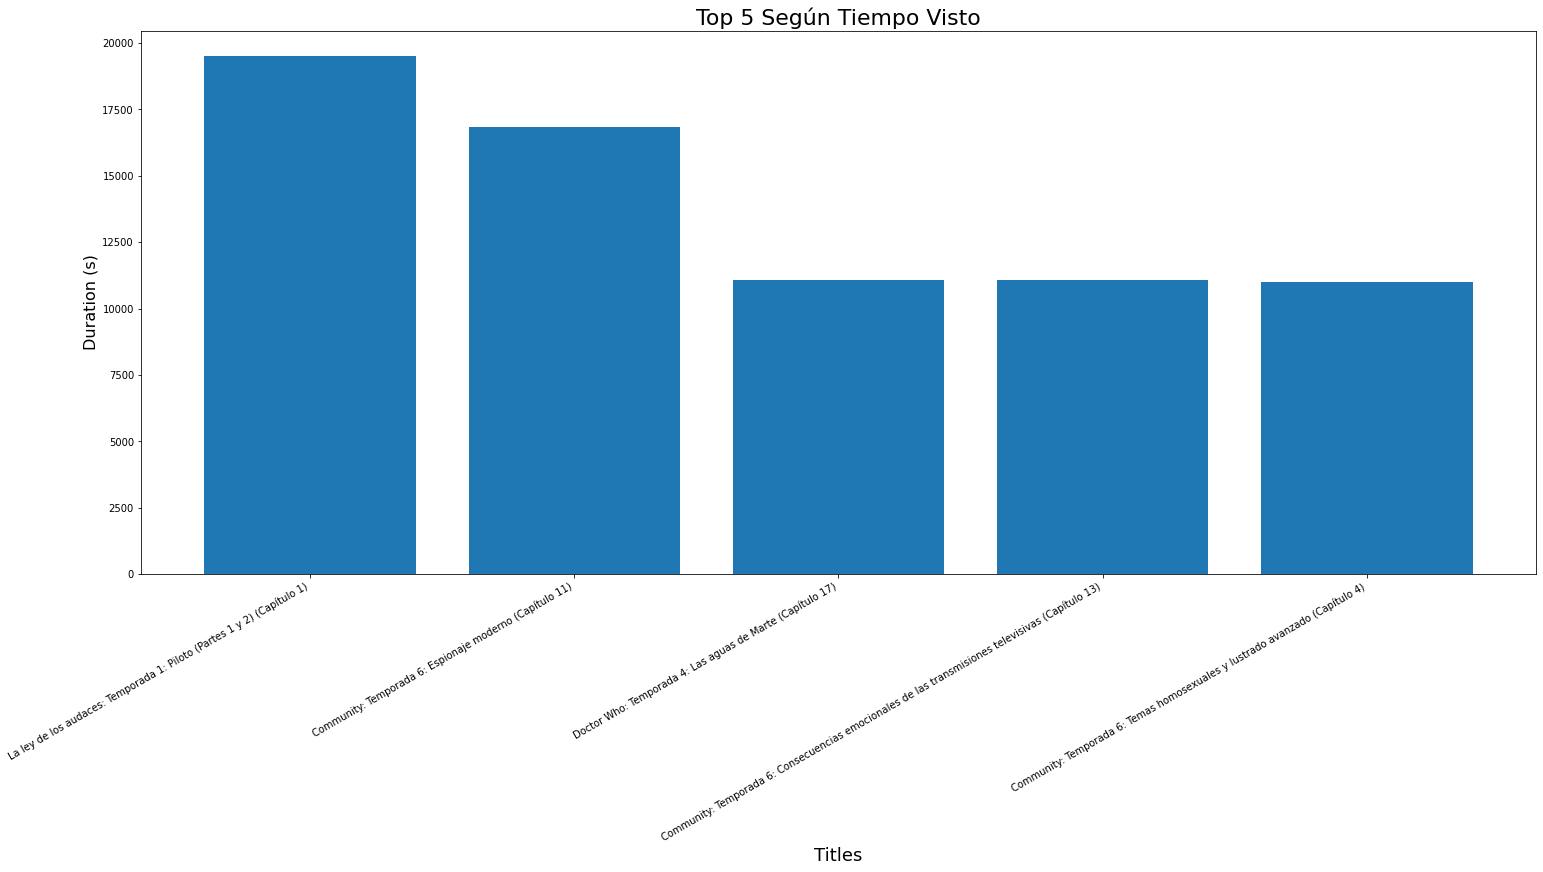

In [39]:
#Graficamos
plt.figure(figsize=(25, 10)) #Cambiamos el tamaño de la plot   
plt.bar(list_tiempo_visto_titles, list_tiempo_visto_duracion) #Ploteamos un bar tomando nuestras listas como "x" - "y"

plt.xticks( #Rotamos los titulos para que no hagan overlapping
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='10'  
)

plt.xlabel('Titles', fontsize=18) #Labeleamos el eje x
plt.ylabel('Duration (s)', fontsize=16) #Labeleamos el eje y
plt.title('Top '+ str(N) + ' Según Tiempo Visto',  fontsize=22) #Titulo
plt.show()

####Por ocurrencias

In [40]:
list_ocurrencias_titles = [] #Creamos una lista vacia para nuestros top "N" titulos
for i in range(len(top_ocurrencias)):
  list_ocurrencias_titles.append(top_ocurrencias[i][0]) #Agregamos los titulos a la lista

In [41]:
list_ocurrencias = [] #Creamos una lista vacia para nuestros top "N" ocurrencias
for i in range(len(top_ocurrencias)):
  list_ocurrencias.append(top_ocurrencias[i][1]) #Agregamos las ocurrencias a la lista

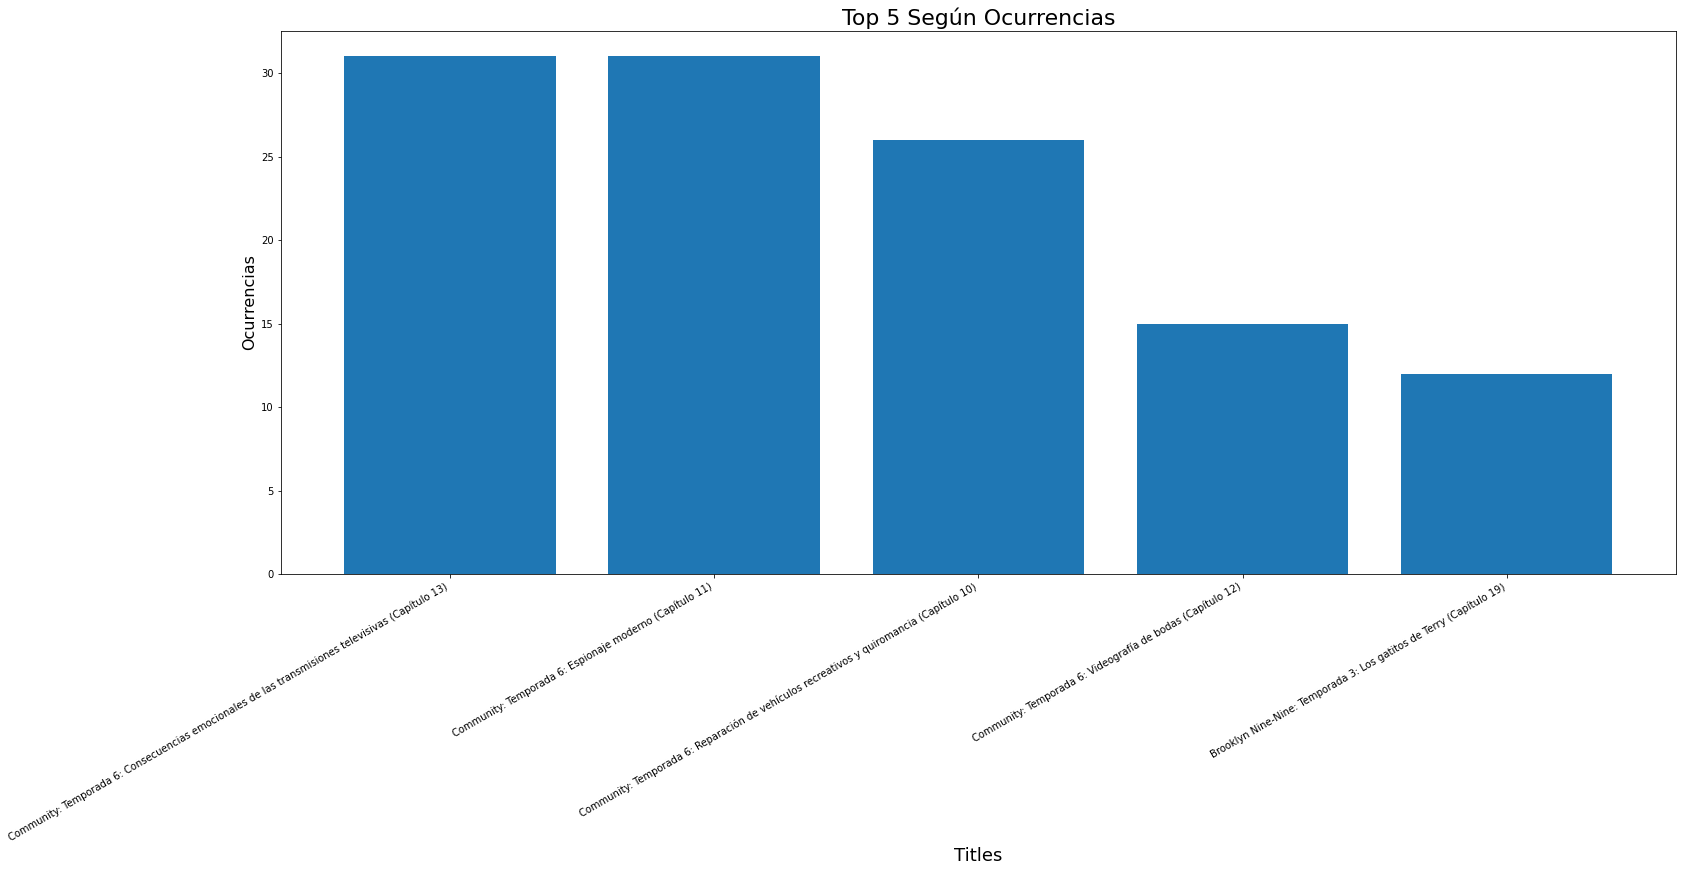

In [42]:
#Graficamos
plt.figure(figsize=(25, 10)) #Cambiamos el tamaño de la plot   
plt.bar(list_ocurrencias_titles, list_ocurrencias) #Ploteamos un bar tomando nuestras listas como "x" - "y"

plt.xticks( #Rotamos los titulos para que no hagan overlapping
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='10'  
)

plt.xlabel('Titles', fontsize=18) #Labeleamos el eje x
plt.ylabel('Ocurrencias', fontsize=16) #Labeleamos el eje y
plt.title('Top '+ str(N) + ' Según Ocurrencias',  fontsize=22) #Título
plt.show()

##**Ejercicio D**

In [43]:
#Function to turn dates into weekdays
def whatDay(date): 
  formated_date = date[0:10]
  d = pd.Timestamp(formated_date)
  return d.day_name()

In [44]:
#Apply the function to our dates, and store in new column
dates = df["Start Time"].apply(whatDay)
df["Week Day"] = dates.values

In [45]:
#Get only the hours from dates
hours = df["Start Time"].apply(lambda date : date[11:13])
df["Hour"] = hours.values

In [46]:
#Create a pivot to graph values
piv = pd.pivot_table(df,index=["Hour"], columns=["Week Day"], fill_value=0)

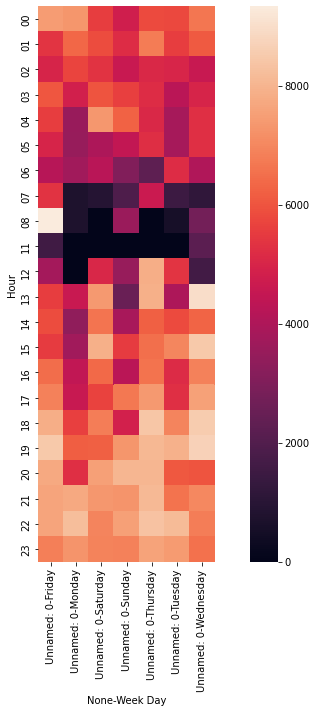

In [47]:
#Graph with Seaborn heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(piv, square=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

##**Ejercicio E**

###Encontrar los títulos vistos por año

In [48]:
#Función que devuelve unicamente el año de una fecha
def sacarAnio(fecha):
  anio = ""
  for year in fecha:
    anio += year
    if len(anio) == 4: return int(anio)

In [49]:
titles_viewed_per_year = {} #Creamos un diccionario para agregar año => títulos
count = 0
cicle_years = sacarAnio(df["Start Time"][0])  #Definimos nuestro año inicial

for element in df["Start Time"]:  #Nos fijamos el año de cada elemento del df
  count+=1
  if sacarAnio(element) != cicle_years or element == min(df["Start Time"]): #Si cambiamos de año o estamos en el último elemento
    titles_viewed_per_year[cicle_years] = count #Agregamos la cantidad de elementos que aparecieron al dic con la key del año que ciclamos
    count = 1
    cicle_years -=1

In [50]:
titles_viewed_per_year

{2022: 295,
 2021: 723,
 2020: 1017,
 2019: 551,
 2018: 917,
 2017: 796,
 2016: 808,
 2015: 1191}

###Graficar la cantidad de títulos en función de los años

In [51]:
list_anios = list(titles_viewed_per_year)                    #Creamos una lista para nuestros años de visualización
list_cant_de_titulos = list(titles_viewed_per_year.values()) #Creamos una lista para nuestros titulos totales

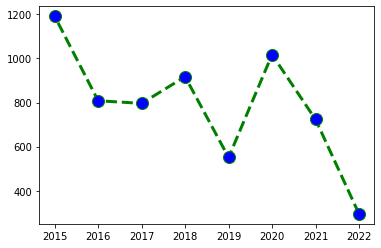

In [52]:
plt.plot(list_anios, list_cant_de_titulos, color='green', linestyle ='dashed', linewidth = 3, marker = 'o', markerfacecolor='blue', markersize =12)

##**Ejercicio F**

In [53]:
total_de_segundos_viendo = sum(df["Duration"].apply(durationToSeconds)) #Sumamos todas las duraciones pasadas a segundos

In [54]:
total_dias_viendo = total_de_segundos_viendo / 86400 #Dividimos el total por 86400 para ver cuantos días hay

In [55]:
print("En total Chona vició netflix por" , int(total_dias_viendo), "días enteros.") #Mostramos el resultado

En total Chona vició netflix por 99 días enteros.


##**BONUS**

###Ejercicio 1.

In [56]:
def isStarWars(title):  #Función para filtrar solamente pelis de Star Wars
  if "Star Wars:" in title:
    return True
  return False

In [57]:
#Aplicamos la función al df y lo guardamos en uno nuevo
dfPelis = df[df["Title"].apply(isMovie)] 
dfStarWars = dfPelis[dfPelis["Title"].apply(isStarWars)]

In [58]:
for title in dfStarWars['Title'].unique():  #Por cada título en el dataFrame, sumamos todos sus duraciones pasadas a segundos y las guardamos en un dict
  starWars_duration = {title:sum(dfStarWars[dfStarWars["Title"] == title]["Duration"].apply(durationToSeconds)) for title in dfStarWars["Title"].unique()}

In [59]:
starWars_mas_vista =sorted(starWars_duration)[0]  #Guardamos la peli más vista

In [60]:
print('La película de Star Wars que más vió Chona por duración fue' , starWars_mas_vista, 'con', starWars_duration[starWars_mas_vista], 'segundos') #Printeamos resultados

La película de Star Wars que más vió Chona por duración fue Star Wars: El Imperio contraataca con 29433 segundos


###Ejercicio 2.

####Install Packages

In [61]:
!pip install cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 9.6 MB/s 


In [62]:
import imdb
from PIL import Image
import requests
from io import BytesIO

ia = imdb.Cinemagoer()

####Mostrar Poster Peli Mas Vista

In [125]:
topMovieList = ia.search_movie('Star Wars: El Imperio contraataca') #Buscamos el título con la api
topMovie = topMovieList[0]  #Como devuelve una lista, guardamos solamente la primera

In [126]:
#Agarramos la cover-url de nuestra pelicula y la mostramos con PIL
response = requests.get(topMovie['cover url'])
topMovieImg = Image.open(BytesIO(response.content))

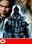

In [127]:
topMovieImg

####Mostrar Poster Series Mas Vista

In [128]:
topSerieList = ia.search_movie('Community') #Buscamos el título con la api
topSeries = topSerieList[0] #Como devuelve una lista, guardamos solamente la primera

In [129]:
#Agarramos la cover-url de nuestra pelicula y la mostramos con PIL
response = requests.get(topSeries['cover url'])
topSeriesImg = Image.open(BytesIO(response.content))

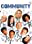

In [130]:
topSeriesImg

####Mostrar Género Mas Visto

In [115]:
allGenres = {}
count = 0
for title in dfPelis["Title"]:
  #Retrive 'movie' from the api
  movieLists = ia.search_movie(title)
  
  if movieLists != []:  #Check if it is a valid title
    movie = movieLists[0]
    
    #Find movie genre
    movieData = ia.get_movie(movie.movieID)
    try:  #Test if the title has a genre
      genre = movieData.data['genres']  
      for genres in genre:
        if genres not in allGenres:
          allGenres[genres] = 0
        allGenres[genres] += 1

    except KeyError as ke:
      print('No genre')

No genre
No genre
No genre
No genre
No genre
No genre
No genre


In [123]:
allGenres #Mostrar todos los géneros

{'Drama': 87,
 'Mystery': 25,
 'Talk-Show': 4,
 'Action': 86,
 'Crime': 39,
 'Music': 10,
 'Thriller': 46,
 'Adventure': 87,
 'Sci-Fi': 85,
 'Comedy': 158,
 'Fantasy': 45,
 'Romance': 41,
 'Biography': 19,
 'Short': 3,
 'Western': 1,
 'Animation': 15,
 'Family': 38,
 'Documentary': 19,
 'Sport': 16,
 'History': 6,
 'War': 8,
 'Horror': 2}

In [124]:
print('El género que más mira Chona es Comedy')

El género que más mira Chona es Comedy
